In [5]:
import boto3
boto3.client("sts").get_caller_identity()["Arn"]

'arn:aws:sts::289474597780:assumed-role/gilders-sagemaker/SageMaker'

In [10]:
import boto3

s3 = boto3.client('s3')

bucket = 'kaggle-housing-pipeline-data'
key = 'data/train.csv'
local_path = 'train.csv'

s3.download_file(bucket, key, local_path)
print("✅ File downloaded successfully!")

✅ File downloaded successfully!


In [11]:
import boto3

s3 = boto3.client('s3')

bucket = 'kaggle-housing-pipeline-data'
key = 'data/test.csv'
local_path = 'test.csv'

s3.download_file(bucket, key, local_path)
print("✅ File downloaded successfully!")

✅ File downloaded successfully!


In [12]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import os
os.getcwd()

'/mnt/custom-file-systems/efs/fs-048c85bdd62f42440_fsap-08a66c36424034c39'

In [18]:
os.listdir()

['train.csv',
 'data',
 'eda.ipynb',
 'test.csv',
 '.ipynb_checkpoints',
 'preprocess.py']

In [19]:
#import data
df = pd.read_csv('train.csv')

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()b\

In [24]:

df.drop(columns=["SalePrice"]).to_csv("train_no_target.csv", index=False)

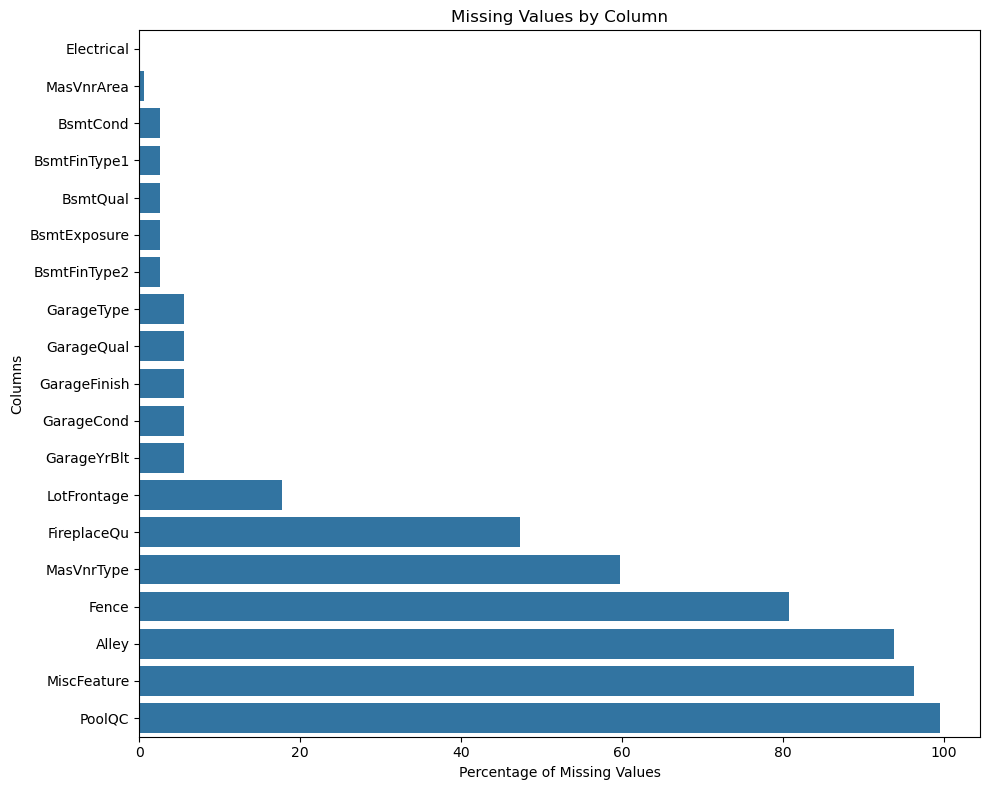

In [23]:


# Calculate missing value percentage per column
missing_percent = df.isnull().mean() * 100

# Filter only columns with missing values (optional)
missing_percent = missing_percent[missing_percent > 0]

# Sort descending for clarity
missing_percent = missing_percent.sort_values(ascending=True)

# Create horizontal barplot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values by Column')
plt.tight_layout()
plt.show()

In [26]:
s3.upload_file('train_no_target.csv', bucket, 'data/train_no_target.csv')

In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]
# Example: Split your dataframe
X = df.drop(columns=["SalePrice"])  # Replace "SalePrice" with your target
y = df["SalePrice"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

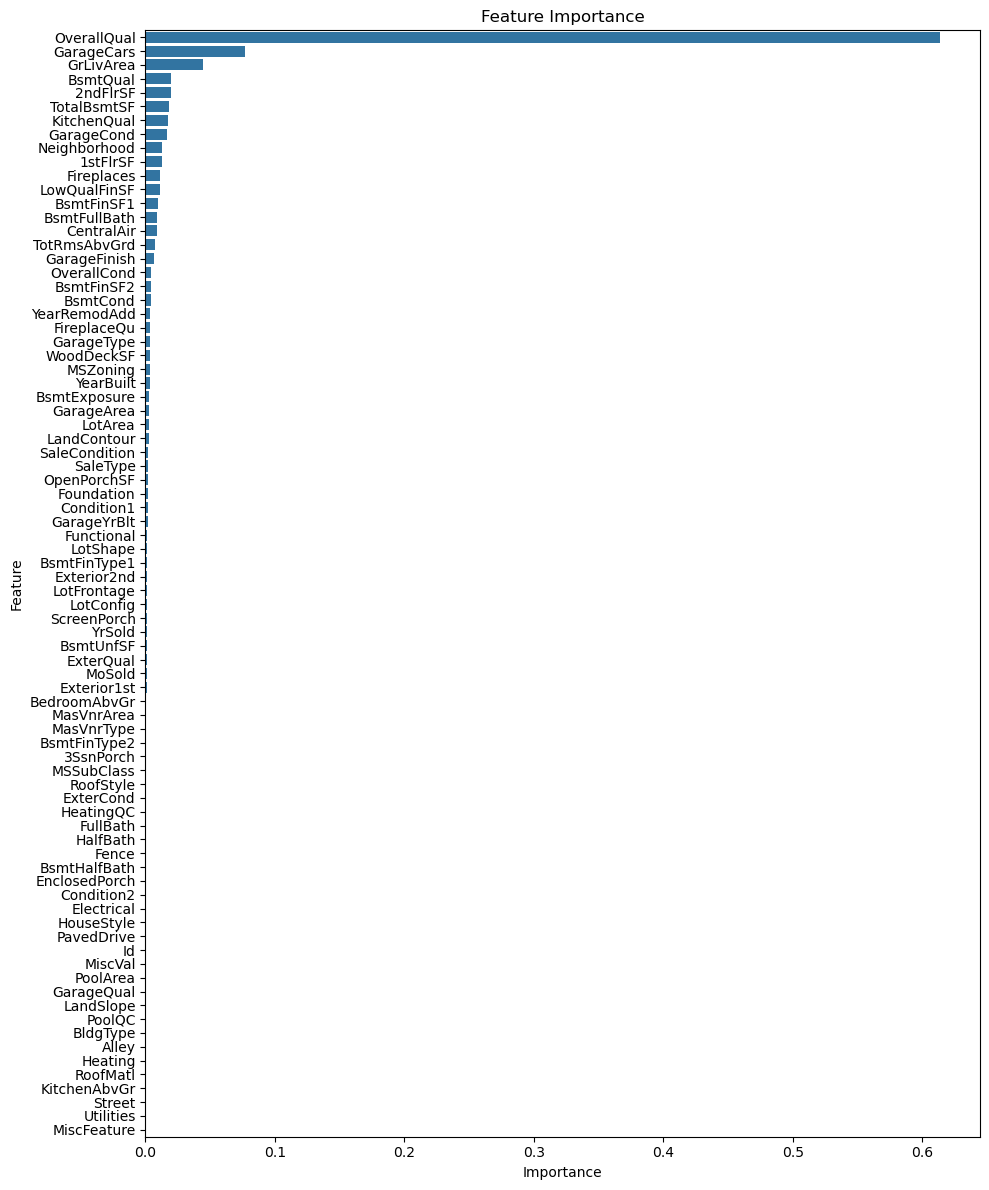

In [34]:
# Sort and plot
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [38]:
# Choose a threshold — for example, 0.02
threshold = 0.02

# Keep only important features
important_features3 = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Subset your training and test data
X_train_reducedv3 = X_train[important_features3]
X_test_reducedv3 = X_test[important_features3]

print(important_features3)

['OverallQual', 'GarageCars', 'GrLivArea', 'BsmtQual']


In [39]:
# Subset your training and test data with a threshold of 0.03
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

print(important_features)

['OverallQual', 'GarageCars', 'GrLivArea']


In [41]:
# Subset your training and test data with a threshold of 0.01
X_train_reducedv2 = X_train[important_features2]
X_test_reducedv2 = X_test[important_features2]

print(important_features2)

['OverallQual', 'GarageCars', 'GrLivArea', 'BsmtQual', '2ndFlrSF', 'TotalBsmtSF', 'KitchenQual', 'GarageCond', 'Neighborhood', '1stFlrSF', 'Fireplaces', 'LowQualFinSF', 'BsmtFinSF1']


In [63]:
# Choose a threshold — for example, 0.02
threshold = 0.02

# Keep only important features
important_features3 = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Subset your training and test data
X_train_reducedv3 = X_train[important_features3]
X_test_reducedv3 = X_test[important_features3]

print(important_features3)

['OverallQual', 'GarageCars', 'GrLivArea', 'BsmtQual']


In [42]:
df2 = X_train_reducedv3

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OverallQual  1168 non-null   int64   
 1   GarageCars   1168 non-null   int64   
 2   GrLivArea    1168 non-null   int64   
 3   BsmtQual     1140 non-null   category
dtypes: category(1), int64(3)
memory usage: 37.8 KB


In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Optional: prevent line breaks

In [52]:
df2[df2.isnull().any(axis=1)]


,OverallQual,GarageCars,GrLivArea,BsmtQual
342,3,2,1040,NaN
1048,5,2,1771,NaN
156,5,2,1040,NaN
778,5,2,2020,NaN
705,4,0,1092,NaN
39,4,0,1152,NaN
553,4,2,1126,NaN
1035,4,1,845,NaN
362,7,2,1922,NaN
533,1,0,334,NaN


In [48]:
df[df['BsmtQual'].isnull()][['TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF']]

,TotalBsmtSF,BsmtFinSF1,BsmtUnfSF
17,0,0,0
39,0,0,0
90,0,0,0
102,0,0,0
156,0,0,0
182,0,0,0
259,0,0,0
342,0,0,0
362,0,0,0
371,0,0,0


In [50]:
df2.head()

,OverallQual,GarageCars,GrLivArea,BsmtQual
254,5,1,1314,TA
1066,6,2,1571,Gd
638,5,0,796,Fa
799,5,1,1768,Gd
380,5,1,1691,TA


In [51]:
df2

,OverallQual,GarageCars,GrLivArea,BsmtQual
254,5,1,1314,TA
1066,6,2,1571,Gd
638,5,0,796,Fa
799,5,1,1768,Gd
380,5,1,1691,TA
...,...,...,...,...
1095,6,2,1314,Gd
1130,4,2,1981,TA
1294,5,2,864,TA
860,7,1,1426,TA


if 'NA' not in df['BsmtQual'].cat.categories:
    df['BsmtQual'] = df['BsmtQual'].cat.add_categories('NA')
df['BsmtQual'] = df['BsmtQual'].fillna('NA')

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OverallQual  1168 non-null   int64   
 1   GarageCars   1168 non-null   int64   
 2   GrLivArea    1168 non-null   int64   
 3   BsmtQual     1140 non-null   category
dtypes: category(1), int64(3)
memory usage: 37.8 KB


In [58]:
if 'NA' not in df2['BsmtQual'].cat.categories:
    df2['BsmtQual'] = df2['BsmtQual'].cat.add_categories('NA')
df2['BsmtQual'] = df2['BsmtQual'].fillna('NA')

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OverallQual  1168 non-null   int64   
 1   GarageCars   1168 non-null   int64   
 2   GrLivArea    1168 non-null   int64   
 3   BsmtQual     1168 non-null   category
dtypes: category(1), int64(3)
memory usage: 37.8 KB


In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1168 non-null   int64   
 1   MSSubClass     1168 non-null   int64   
 2   MSZoning       1168 non-null   category
 3   LotFrontage    951 non-null    float64 
 4   LotArea        1168 non-null   int64   
 5   Street         1168 non-null   category
 6   Alley          74 non-null     category
 7   LotShape       1168 non-null   category
 8   LandContour    1168 non-null   category
 9   Utilities      1168 non-null   category
 10  LotConfig      1168 non-null   category
 11  LandSlope      1168 non-null   category
 12  Neighborhood   1168 non-null   category
 13  Condition1     1168 non-null   category
 14  Condition2     1168 non-null   category
 15  BldgType       1168 non-null   category
 16  HouseStyle     1168 non-null   category
 17  OverallQual    1168 non-null   int64

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Feature lists
numeric_features = ['OverallQual', 'GarageCars', 'GrLivArea']
categorical_features = ['BsmtQual']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Example: Linear Regression Pipeline
linreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Fit and evaluate
linreg_pipeline.fit(X_train_reducedv3, y_train)
print(f"Train R^2: {linreg_pipeline.score(X_train_reducedv3, y_train)}")

Train R^2: 0.768323532388255


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Feature lists
numeric_features = ['OverallQual', 'GarageCars', 'GrLivArea']
categorical_features = ['BsmtQual']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Example: Linear Regression Pipeline
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor())
])

# Fit and evaluate
xgb_pipeline.fit(X_train_reducedv3, y_train)
print(f"Train R^2: {xgb_pipeline.score(X_train_reducedv3, y_train)}")

Train R^2: 0.9361377954483032


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(
    xgb_pipeline,             # your full pipeline
    param_grid_xgb,
    cv=5,                     # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # or 'r2', 'neg_mean_absolute_error', etc.
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train_reducedv3, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['OverallQual',
                                                                          'GarageCars',
                                                                          'GrLivArea']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BsmtQual'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=Non...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [73]:

# Best cross-validated score (R²)
print("Best CV R²:", grid_search_xgb.best_score_)

# Test score (R²) on held-out test set
print("Test R²:", grid_search_xgb.score(X_test, y_test))

Best CV R²: -35037.546484375
Test R²: -35173.7265625
